# **Análise dos desembolsos do BNDES e do impacto de seus investimentos na agropecuária brasileira**
## **TIME 13**
### **Equipe:**
- **Bernardo Mendonça** (Graduando em Engenharia Nuclear - UFRJ)
- **Erica Ferreira** (Graduando em Engenharia de Controle e Automação - UFRJ)
- **Pedro Boechat** (Graduando em Engenharia de Computação de Informação - UFRJ)
- **Pedro Paixão** (Graduado em Matemática Aplicada - UFRJ)
- **Rodrigo Benoliel** (Graduando em Engenharia Elétrica - UFRJ)

<hr>

# **1. Introdução**
## **O que é o BNDES? Quais são suas funções? Como opera?**
### Ao longo das últimas décadas, o crescimento de diferentes segmentos da economia brasileira vem sido apoiado pelo Banco Nacional de Desenvolvimento Social (BNDES). Essa instituição pública consiste em um dos maiores bancos de desenvolvimento do mundo e possui como missão viabilizar soluções que adicionem investimentos para o desenvolvimento sustentável da nação brasileira.
### O BNDES apoia empreendedores de todos os portes e em todos os segmentos da economia brasileira, tendo em vista a possibilidade de geração de empregos, renda e de inclusão social para o Brasil. Esse suporte, por sua vez, se dá por meio de financiamento a investimentos, subscrição de valores mobiliários, prestação de garantia e concessão de recursos não reembolsáveis a projetos de caráter social, cultural e tecnológico. A decisão pela concessão ou não de um apoio é realizada por meio de avaliações técnicas, nos quais se avaliam o potencial impacto e inovação da proposta, além de outros aspectos de cunho financeiro e socioambiental.
## **O Plano de Dados Abertos e o BNDES**
### Considerando a responsabilidade e a fundamental importância do BNDES para o desenvolvimento nacional, a instituição recentemente aderiu à Política de Dados Abertos do Poder Executivo Federal, com a publicação do **Plano de Dados Abertos do BNDES**. Essa decisão possibilita estabelecer diretrizes e planos de ação para gerar dados estruturados e de fácil acesso ao grande público, garantindo maior transparência às ações da instituição e fomentando o uso desses dados pela população em geral.
### Tendo em vista as motivações apresentadas anteriormente, o BNDES lançou recentemente o **Prêmio Dados Abertos**. Esse evento, de caráter competitivo, tem por objetivo incentivar o uso dos dados abertos do BNDES para criar novas ferramentas de análise de informações para a instituição. As produções devem ser desenvolvidas por grupos de até cinco pessoas e publicadas até o dia 31/08/2021, utilizando ao menos uma das bases disponibilizadas em sua plataforma. 

# **2. Apresentação do problema e objetivos**
### Apesar da importância do BNDES ser historicamente conhecida, informações acerca dos efeitos a curto e longo prazo dos investimentos para os diferentes setores da indústria e para os diferentes municípios do país ainda são limitadas. Como algumas razões para essa pouca compreensão, pode-se citar a complexidade do problema e a grande variedade de contextos socioeconômicos específicos a cada uma das empresas, que por sua vez afetará seus desempenhos. Por outro lado, uma melhor compreensão dos resultados desse apoio nas diferentes pode consistir em uma ferramenta importante para decidir quais empresas apoiar em futuros e para estabelecer estratégias para que os novos investimentos sejam mais efetivos.
### A existência do Portal de Dados Abertos, nesse sentido, mostra-se como uma oportunidade para melhor compreender as dinâmicas de investimento do BNDES e seus resultados. Dessa forma, buscando compreender melhor o papel do BNDES no desenvolvimento socioeconômico em diferentes setores da sociedade brasileira, a presente análise tem por objetivo avaliar a distribuição dos investimentos realizados pela instituição em diferentes áreas e seu impacto para o aumento da produção dos empreendedores. Além disso, busca-se entender a relação entre o nível de inovação da empresa, o apoio recebido pelo BNDES e os resultados obtidos nos últimos anos. Em particular, o caso do setor agropecuário será analisado de forma mais específica, considerando seu caráter fundamental no desenvolvimento nacional e na projeção mundial do Brasil em termos tecnológicos e econômicos. 

# **3. Metodologia**
## **a) Tecnologia**
### A análise requereu um estudo aprofundado dos dados, incluindo a manipulação das tabelas, aplicação de métodos estatísticos e construção de gráficos. Para que isso se tornasse viável, foi necessário o uso de linguagem de programação adequada para fins de Ciência de Dados. Como alternativa proeminente na área, escolheu-se utilizar Python [versão do nb final aqui]. Embarcado nessa tecnologia, foram utilizadas as bibliotecas:
`Manipulação de arquivos:`

In [2]:
import os

`Manipulação de dados:`

In [1]:
import pandas as pd

# Formatação da representação de números de ponto flutuante
pd.options.display.float_format = "{:,.2f}".format

`Instrumental matemático:`

In [3]:
import numpy as np

`Construção de gráficos:`

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

## **b) Dados**
### **Desembolsos mensais - BNDES ([FONTE](https://dadosabertos.bndes.gov.br/dataset/desembolsos-mensais))**
### Sabe-se que as atividades do BNDES abrangem uma série de operações em diversos ramos do mercado financeiro brasileiro. Como tal, os dados disponíveis no Portal de Dados Abertos da instituição são amplos nesse contexto e oferecem um largo escopo de estudo. Foi decidido, porém, focar na base de Desembolsos Mensais. Essa escolha se deve ao fato de que esse constitui a maior coleção de informações em série temporal, apresentando maior potencial de análise e resultados tendo em vista o objetivo do projeto.

In [5]:
desembolsos_df = pd.read_csv("./data/desembolsos-mensais.zip", encoding="UTF-8", sep=";", decimal=",")

### A partir do arquivo `desembolso_df` foi calculado os 20 municípios de cada região com as maiores quantidades de financiamentos rotulados como `inovativos`. A ideia ao filtrar esses dados é posteriormente analisar se investimentos em inovação tem maior correlação com a produção.

In [26]:
top_20 = pd.read_csv('./data/top_20_mun_inovativos.csv', index_col = 0)

### A base condensa dados referentes aos desembolsos de crédito do BNDES, diretos ou indiretos, a beneficiários de diversos setores econômicos de localização geográfica definida de 1995 a 2020. Sua estrutura consiste em um arquivo CSV (Comma Separated Values) de 16 colunas, com valores dos seguintes tipos:

In [6]:
print(desembolsos_df.info())
desembolsos_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244804 entries, 0 to 3244803
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   ano                     int64  
 1   mes                     int64  
 2   forma_de_apoio          object 
 3   produto                 object 
 4   instrumento_financeiro  object 
 5   inovacao                object 
 6   porte_de_empresa        object 
 7   regiao                  object 
 8   uf                      object 
 9   municipio               object 
 10  municipio_codigo        int64  
 11  setor_cnae              object 
 12  subsetor_cnae_agrupado  object 
 13  setor_bndes             object 
 14  subsetor_bndes          object 
 15  desembolsos_reais       float64
dtypes: float64(1), int64(3), object(12)
memory usage: 396.1+ MB
None


,ano,mes,forma_de_apoio,produto,instrumento_financeiro,inovacao,porte_de_empresa,regiao,uf,municipio,municipio_codigo,setor_cnae,subsetor_cnae_agrupado,setor_bndes,subsetor_bndes,desembolsos_reais
0,2010,9,DIRETA,BNDES MERCADO DE CAPITAIS,MERCADO DE CAPITAIS,NÃO,GRANDE,SUDESTE,RIO DE JANEIRO,RIO DE JANEIRO,3304557,INDÚSTRIA DE TRANSFORMAÇÃO,"COQUE, PETRÓLEO E COMBUSTÍVEL",INDUSTRIA,QUÍMICA E PETROQUÍMICA,"24,753,538,073.60"
1,2009,7,DIRETA,BNDES FINEM,PROGRAMA PETROBRAS,NÃO,GRANDE,NORDESTE,PERNAMBUCO,IPOJUCA,2607208,INDÚSTRIA DE TRANSFORMAÇÃO,"COQUE, PETRÓLEO E COMBUSTÍVEL",INDUSTRIA,QUÍMICA E PETROQUÍMICA,"9,889,997,969.99"
2,2009,7,DIRETA,BNDES FINEM,PROGRAMA PETROBRAS,NÃO,GRANDE,SUDESTE,RIO DE JANEIRO,DIVERSOS,9999998,INDÚSTRIA DE TRANSFORMAÇÃO,"COQUE, PETRÓLEO E COMBUSTÍVEL",INDUSTRIA,QUÍMICA E PETROQUÍMICA,"9,409,998,497.06"
3,2012,12,DIRETA,BNDES FINEM,PROINVESTE,NÃO,GRANDE,CENTRO OESTE,DISTRITO FEDERAL,DIVERSOS,9999998,COMÉRCIO E SERVIÇOS,ADMINISTRAÇÃO PÚBLICA,COMÉRCIO E SERVIÇOS,COMÉRCIO E SERVIÇOS,"7,271,078,745.30"
4,2009,7,DIRETA,BNDES FINEM,PROGRAMA PETROBRAS,NÃO,GRANDE,SUDESTE,RIO DE JANEIRO,DIVERSOS,9999998,COMÉRCIO E SERVIÇOS,TRANSPORTE TERRESTRE,INFRAESTRUTURA,OUTROS TRANSPORTES,"5,699,997,243.57"


### Mais detalhes acerca de cada um dos parâmetros podem ser encontrados no dicionário de dados presente na fonte.

### **Produção Agrícola Municipal (PAM) - IBGE ([FONTE](https://sidra.ibge.gov.br/tabela/5457))**
### Apesar da qualidade e completude dos dados de desembolsos disponíveis no Portal de Dados Abertos, faltava para a análise uma métrica de resultado que permitisse o estudo de retorno de tais investimentos. Como postulado na introdução, será desenvolvido o interesse pelo setor agropecuário. Assim, identificou-se a base de dados da Produção Agrícola Municipal (PAM), disponível pelo IBGE, constituindo uma fonte apropriada e confiável para a análise.

In [6]:
pam_df = pd.read_csv("./data/PAM.zip", sep=";")

### Por meio da fonte, foram selecionadas todas as variáveis disponíveis e filtrados apenas os produtos totais das lavouras para cada município brasileiro entre os anos de 1990 e 2019. Devido à plataforma que exporta os dados, estes apresentavam algumas inconsistências, que foram corrigidas no arquivo `pam_formatting.ipynb`. O produto final dessa correção é um CSV com 8 colunas de tipos:

In [14]:
print(pam_df.info())
pam_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166890 entries, 0 to 166889
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   municipio_codigo        166890 non-null  int64  
 1   ano                     166890 non-null  int64  
 2   area_plantada           159452 non-null  float64
 3   area_colhida            159379 non-null  float64
 4   valor_reais             141062 non-null  float64
 5   valor_cruzeiros         13395 non-null   float64
 6   valor_cruzeiros_reais   4923 non-null    float64
 7   razao_colheita_plantio  159379 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 10.2 MB
None


,municipio_codigo,ano,area_plantada,area_colhida,valor_reais,valor_cruzeiros,valor_cruzeiros_reais,razao_colheita_plantio
0,1100015,1990,"22,275.00","22,275.00",NaN,"462,257.00",NaN,1.00
1,1100015,1991,"23,005.00","23,005.00",NaN,"2,423,889.00",NaN,1.00
2,1100015,1992,"36,020.00","36,020.00",NaN,"41,232,411.00",NaN,1.00
3,1100015,1993,"38,360.00","38,360.00",NaN,NaN,"1,079,677.00",1.00
4,1100015,1994,"42,899.00","42,899.00","14,864.00",NaN,NaN,1.00


# **4. Análise da base '`Desembolsos mensais`'**
### A exploração de dados foi iniciada pelo estudo da tabela Desembolsos Mensais. Por ela conter dados majoritariamente categóricos, considerou-se de interesse estudar os valores de investimentos agregados sob essas diferentes categorias, e resultados relevantes foram levantados.
### O primeiro fato interessante identificado foi o fato de que os municípios de mais alto investimento médio não correspondem a grandes centros econômicos nacionais, mas sim de áreas predominantemente rurais. Devido à capacitação realizada na competição, tinha-se noção de que o BNDES realiza grandes financiamentos agrônomos, e a observação dos números tornou esse fato muito mais evidente.

### Tendo em vista o propósito do BNDES, e conscientes de sua posição favorável frente a micro e pequenas empresas, visualizaram-se os valores investidos agregados aos portes dos beneficiários. Como esperado, notou-se que em geral o valor médio concedido a grandes empresas é superior ao de menores. Porém, surpreendentemente, o número de financiamentos de empresas de micro porte é tão alto que seu investimento absoluto chega a ultrapassar o de pequenas e médias.

- **Tabela de investimentos por município (todos os anos)**

In [27]:
# Tabela de investimentos por município (todos os anos)
desembolso_por_municipio = desembolsos_df[["municipio", "uf", "regiao", "desembolsos_reais"]].groupby(["municipio"]).agg(uf=("uf", "first"), regiao=("regiao", "first"), numero_investimentos=("desembolsos_reais", "count"), soma_investimentos=("desembolsos_reais", "sum")).reset_index()
desembolso_por_municipio["investimento_medio"] = desembolso_por_municipio["soma_investimentos"]/desembolso_por_municipio["numero_investimentos"]
desembolso_por_municipio = desembolso_por_municipio.sort_values(by="investimento_medio", ascending=False)
desembolso_por_municipio.head(10)

,municipio,uf,regiao,numero_investimentos,soma_investimentos,investimento_medio
1433,CURRAL NOVO DO PIAUI,PIAUI,NORDESTE,4,"828,193,336.41","207,048,334.10"
851,CALDEIRAO GRANDE DO PIAUI,PIAUI,NORDESTE,4,"164,948,704.73","41,237,176.18"
2806,MARCOLANDIA,PIAUI,NORDESTE,12,"464,779,902.21","38,731,658.52"
77,AGUIARNOPOLIS,TOCANTINS,NORTE,113,"3,411,425,385.60","30,189,605.18"
3522,PEDRA GRANDE,RIO GRANDE DO NORTE,NORDESTE,17,"474,473,584.60","27,910,210.86"
3440,PARAZINHO,RIO GRANDE DO NORTE,NORDESTE,39,"957,080,861.36","24,540,534.91"
1691,FERREIRA GOMES,AMAPA,NORTE,49,"1,119,455,751.93","22,846,035.75"
5085,UMBURANAS,BAHIA,NORDESTE,58,"1,263,755,393.16","21,788,886.09"
4739,SERRA DO MEL,RIO GRANDE DO NORTE,NORDESTE,29,"564,772,788.89","19,474,923.75"
2135,IPOJUCA,PERNAMBUCO,NORDESTE,1113,"21,430,024,921.86","19,254,290.14"


- **Tabela de investimentos por porte de empresa**

In [28]:
# Tabela de investimentos por porte de empresa (todos os anos)
desembolso_por_porte = desembolsos_df[["porte_de_empresa", "desembolsos_reais"]].groupby(["porte_de_empresa"]).agg(numero_investimentos=("desembolsos_reais", "count"), soma_investimentos=("desembolsos_reais", "sum")).reset_index()
desembolso_por_porte["investimento_medio"] = desembolso_por_porte["soma_investimentos"]/desembolso_por_porte["numero_investimentos"]
desembolso_por_porte = desembolso_por_porte.sort_values(by="soma_investimentos", ascending=False)
desembolso_por_porte.head()

,porte_de_empresa,numero_investimentos,soma_investimentos,investimento_medio
0,GRANDE,266732,"1,356,754,840,749.88","5,086,584.44"
1,MICRO,1943576,"253,535,192,571.85","130,447.79"
2,MÉDIA,334967,"189,261,530,730.15","565,015.45"
3,PEQUENA,699529,"147,661,023,200.94","211,086.35"


### As observações até então indicam grande atuação do BNDES em áreas não-urbanas e em empresas não necessariamente de grande porte. Para ter mais clareza acerca desta hipótese, analisou-se o comportamento dos investimentos tendo em mente o tamanho e setor CNAE dos beneficiários. O resultado apoiou a suposição, com a presença forte de empresas médias, pequenas e micros de agropecuária e indústria extrativa nos maiores financiamentos médios.

- **Tabela de investimentos por porte de empresa e setor CNAE**

In [33]:
desembolso_por_porte_setor_cnae = desembolsos_df[["porte_de_empresa", "setor_cnae", "desembolsos_reais"]]\
                                                  .groupby(["porte_de_empresa", "setor_cnae"])\
                                                  .agg(numero_investimentos=("desembolsos_reais", "count"),
                                                  soma_investimentos=("desembolsos_reais", "sum"))\
                                                  .reset_index()
                                                  
desembolso_por_porte_setor_cnae["investimento_medio"] = desembolso_por_porte_setor_cnae["soma_investimentos"]/desembolso_por_porte_setor_cnae["numero_investimentos"]
desembolso_por_porte_setor_cnae = desembolso_por_porte_setor_cnae.sort_values(by="investimento_medio", ascending=False)
desembolso_por_porte_setor_cnae

,porte_de_empresa,setor_cnae,numero_investimentos,soma_investimentos,investimento_medio
3,GRANDE,INDÚSTRIA EXTRATIVA,2874,"26,609,206,794.76","9,258,596.66"
1,GRANDE,COMÉRCIO E SERVIÇOS,124678,"736,052,245,642.65","5,903,625.70"
2,GRANDE,INDÚSTRIA DE TRANSFORMAÇÃO,120471,"564,698,737,601.73","4,687,424.67"
0,GRANDE,AGROPECUÁRIA,18709,"29,394,650,710.74","1,571,150.29"
8,MÉDIA,AGROPECUÁRIA,27358,"22,568,170,921.22","824,920.35"
9,MÉDIA,COMÉRCIO E SERVIÇOS,193287,"122,155,062,227.78","631,987.99"
11,MÉDIA,INDÚSTRIA EXTRATIVA,3576,"1,681,738,917.81","470,284.93"
12,PEQUENA,AGROPECUÁRIA,98253,"41,312,471,335.28","420,470.33"
10,MÉDIA,INDÚSTRIA DE TRANSFORMAÇÃO,110746,"42,856,558,663.34","386,980.65"
15,PEQUENA,INDÚSTRIA EXTRATIVA,5229,"1,511,371,120.57","289,036.36"


# **5. Análise da base '`PAM`'**
### Como notado nos dados anteriores, o setor agropecuário apresenta grande destaque nos investimentos no BNDES. Tal observação vai a encontro do importante papel deste setor cenário nacional, concentrando grande parte do desenvolvimento econômico do país como um todo, como atestado por recentes indicadores do Produto Interno Bruto brasileiro (chegando a 26,6% do PIB total¹). Além disso, como reforçado pela visão “Agro é Tech”, essa área também concentra grande parte das inovações no setor tecnológico.
### Nesse caso, torna-se interessante entender como as dinâmicas de investimentos, inovações e resultados se dão para esse tipo de empreendimento. Tendo isso em mente, a partir das observações iniciais realizadas a partir dos dados de Desembolsos Mensais, foi decidido por prosseguir a análise de forma mais específica, tendo como referência o conjunto de dados relativos à Produção Agrícola Municipal. Algumas das perguntas a serem levantadas, nesse sentido, são: quais municípios recebem mais e menos verbas referentes ao setor agropecuário? Como a realização (ou não) de inovações afetam os investimentos do BNDES e os resultados desses empreendimentos?
### Para começar a responder a essas questões, decidiu-se por analisar os dados de PAM descritos anteriormente. Esse conjunto de dados foi pré-processado como já descrito, passando a conter informações municipais de área plantada, área colhida e valor da produção por ano, em reais ou em cruzeiros, além da razão entre a colheita e o plantio.
### Um filtro feito posteriormente é a retirada de dados dos anos anteriores a 1997 e posteriores a 2019, porque eles não apresentam dados suficientes.
### Além de filtrada para conter apenas dados da área de agricultura, a base de desembolsos foi agrupada por município, permitindo sumarizar a situação de investimentos em cada uma das cidades. As duas bases de dados (desembolsos e PAM) foram mescladas, de forma a produzir uma tabela como a seguir, contendo dados financeiros, geográficos e agropecuários:
- ### **Tabela mesclada**

In [7]:
# Torna os dados de desembolso compatíveis com os dados da PAM
desembolsos_df = desembolsos_df[((desembolsos_df['setor_bndes'] == 'AGROPECUÁRIA') & (desembolsos_df.ano.astype(int) <= 2019) & (desembolsos_df.ano.astype(int) >= 1997))]

# Pegando só os valores de produção existentes
pam_df = pam_df.loc[(pam_df['ano'].astype(int) >= 1997) & (pam_df.ano.astype(int) <= 2019)]

# Agrupando os desembolsos por município
desembolsos_df = desembolsos_df[["municipio", "municipio_codigo", "desembolsos_reais", 'regiao','inovacao']]\
                .groupby(["municipio"])\
                .agg(municipio_codigo=("municipio_codigo", "first"), 
                     desembolso_count=("desembolsos_reais", "count"), 
                     desembolso_sum=("desembolsos_reais", "sum"),
                     inovacao=("inovacao", lambda x: x.tolist().count("SIM")), 
                     regiao = ('regiao', 'first'))\
                .reset_index()

# Junta PAM com Desembolsos BNDES
desembolso_pam = desembolsos_df.merge(pam_df,left_on='municipio_codigo',right_on='municipio_codigo',how='inner')

desembolso_pam.head()

,municipio,municipio_codigo,desembolso_count,desembolso_sum,inovacao,regiao,ano,area_plantada,area_colhida,valor_reais,valor_cruzeiros,valor_cruzeiros_reais,razao_colheita_plantio
0,ABADIA DE GOIAS,5200050,44,"7,860,183.40",0,CENTRO OESTE,1997,280.00,280.00,346.00,NaN,NaN,1.00
1,ABADIA DE GOIAS,5200050,44,"7,860,183.40",0,CENTRO OESTE,1998,560.00,560.00,263.00,NaN,NaN,1.00
2,ABADIA DE GOIAS,5200050,44,"7,860,183.40",0,CENTRO OESTE,1999,470.00,470.00,171.00,NaN,NaN,1.00
3,ABADIA DE GOIAS,5200050,44,"7,860,183.40",0,CENTRO OESTE,2000,320.00,320.00,124.00,NaN,NaN,1.00
4,ABADIA DE GOIAS,5200050,44,"7,860,183.40",0,CENTRO OESTE,2001,255.00,255.00,116.00,NaN,NaN,1.00


### Depois de mesclada as duas tabelas, elas são agora agrupadas por região e por municipio respectivamente

- ### **Tabela agrupada por Região**

In [27]:
desembolso_pam.razao_colheita_plantio = desembolso_pam.razao_colheita_plantio.astype(float)

df_regiao =  desembolso_pam[['regiao',"area_plantada", "area_colhida", 'valor_reais', 'razao_colheita_plantio', 'desembolso_sum', 'desembolso_count']]\
                .groupby(["regiao"])\
                .agg(regiao_br =  ("regiao", "first"), 
                     area_plantada_sum = ("area_plantada", "sum"), 
                     desembolso_count=("desembolso_count", "sum"), 
                     desembolso_sum=("desembolso_sum", "sum"), 
                     area_colhida = ('area_colhida', 'sum'), 
                     valor_reais = ('valor_reais', 'sum'))\
                .reset_index()
                
df_regiao.head()

,regiao,regiao_br,area_plantada_sum,desembolso_count,desembolso_sum,area_colhida,valor_reais
0,CENTRO OESTE,CENTRO OESTE,"404,102,345.00",1978437,"985,320,926,976.37","401,673,303.00","896,837,122.00"
1,NORDESTE,NORDESTE,"249,803,291.00",917355,"272,101,385,586.04","236,733,158.00","458,266,638.00"
2,NORTE,NORTE,"63,258,445.00",548435,"154,567,490,656.79","62,199,737.00","171,600,035.00"
3,SUDESTE,SUDESTE,"291,189,983.00",4115850,"968,302,691,810.52","289,284,897.00","1,088,544,425.00"
4,SUL,SUL,"431,792,025.00",7445215,"1,705,308,167,643.86","426,822,242.00","1,020,152,961.00"


- ### **Tabela agrupada por Município**

In [32]:
df_municipio = desembolso_pam[['municipio','regiao',"area_plantada", 
                    "area_colhida", 'valor_reais', 'razao_colheita_plantio', 
                    'desembolso_sum', 'desembolso_count', 'municipio_codigo', 'inovacao']]\
                .groupby(["municipio"])\
                .agg(razao = ('razao_colheita_plantio', np.mean), 
                     regiao_br = ("regiao", "first"), 
                     area_plantada_sum = ("area_plantada", "sum"), 
                     desembolso_count=("desembolso_count", "sum"), 
                     desembolso_sum=("desembolso_sum", "sum"), 
                     area_colhida = ('area_colhida', 'sum'), 
                     valor_reais = ('valor_reais', 'sum'),
                     municipio_cod = ('municipio_codigo', 'first'))\
                .reset_index()

df_municipio['inovativo'] = ['Sim'  if x in list(top_20.municipio_codigo) else 'Não' for x in df_municipio.municipio_cod]

df_municipio.head()

,municipio,razao,regiao_br,area_plantada_sum,desembolso_count,desembolso_sum,area_colhida,valor_reais,municipio_cod,inovativo
0,ABADIA DE GOIAS,1.00,CENTRO OESTE,"15,719.00",1012,"180,784,218.20","15,709.00","29,586.00",5200050,Não
1,ABADIA DOS DOURADOS,1.00,SUDESTE,"83,720.00",4163,"542,486,784.62","83,405.00","172,642.00",3100104,Não
2,ABADIANIA,0.99,CENTRO OESTE,"200,976.00",1978,"433,921,503.13","198,996.00","414,398.00",5200100,Não
3,ABAETE,0.99,SUDESTE,"75,799.00",10350,"1,228,874,930.63","74,899.00","166,883.00",3100203,Não
4,ABAETETUBA,0.99,NORTE,"172,492.00",230,"13,593,816.73","172,227.00","2,233,899.00",1500107,Não


### Iniciando essa análise, pode-se levantar o valor médio desembolsado pelo BNDES por região, no caso do setor em agropecuária. Na figura a seguir, esses resultados são demonstrados, indicando uma concentração dos investimentos na região Centro-Oeste. A predominância dessa região pode ser justificada pela dinâmica econômica dos estados de Goiás, Mato Grosso e Mato Grosso do Sul, que concentram uma maior quantidade de espaços dedicados à atividades neste setor.

Text(0.5, 0.98, 'Valor médio desembolsado pelo BNDES por região')

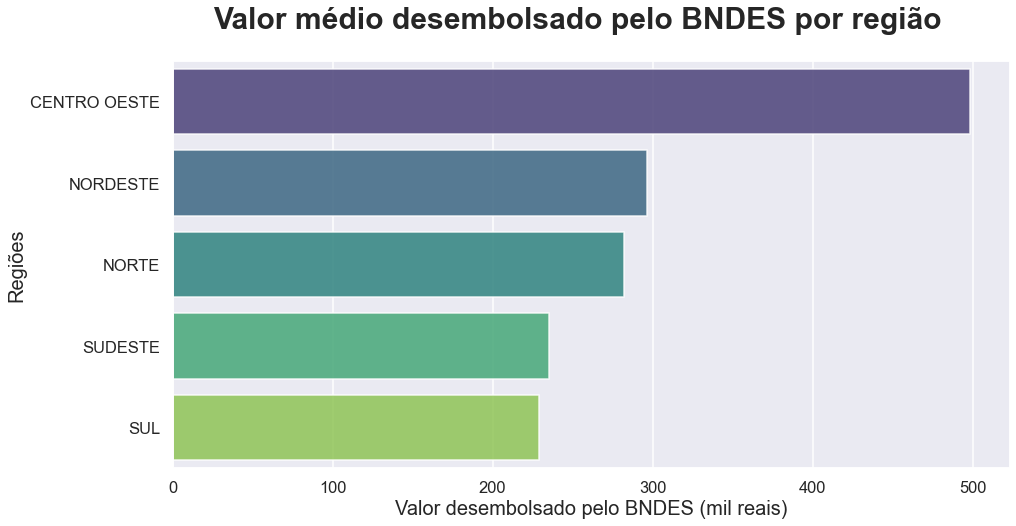

In [34]:
sns.set_theme(style="darkgrid")

sns.set_context("talk")

fig, ax = plt.subplots(figsize = (15,7.5))

ax = sns.barplot(data = df_regiao, 
                x = df_regiao.desembolso_sum / (df_regiao.desembolso_count * 10 ** 3),
                y = df_regiao.regiao_br.str.strip(),
                palette = "viridis",
                alpha = .85, 
                linewidth = 1.5,
                orient = 'h',
                ci = None)

ax.set_xlabel('Valor desembolsado pelo BNDES (mil reais)', 
                  fontsize = 20, 
                  y = -0.3)
    
ax.set_ylabel('Regiões', 
                fontsize = 20, 
                y = 0.5)

fig.suptitle('Valor médio desembolsado pelo BNDES por região', 
                fontsize = 30, 
                fontweight = 'bold',
                y = 0.98)

### Expandindo essa análise, torna-se interessante entender se o valor desembolsado pelo BNDES se correlaciona, de alguma forma, com a produção agrícola em cada um dos municípios. Ao mesmo tempo que, por um lado, se espera que valores mais altos sejam dedicados à empreendimentos de maior porte (isto é, municípios já com alta produção), espera-se também que o próprio investimento deva favorecer a produção dos municípios, na medida em que possibilita avanços técnicos, tecnológicos e inovação no setor agrícola. Apresentamos a seguir um gráfico do valor total desembolsado pelo BNDES, em milhões de reais, em comparação à produção agrícola em cada município. 

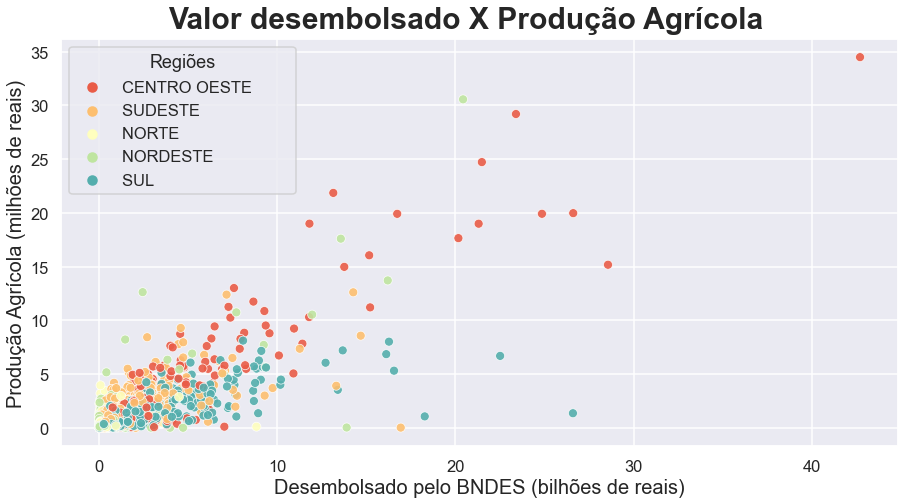

In [12]:
sns.set_theme(style="darkgrid")

sns.set_context("talk")

fig, ax = plt.subplots(figsize = (15,7.5))

ax = sns.scatterplot(x = df_municipio.desembolso_sum / (10 ** 9), 
                     y = df_municipio.valor_reais / (10 ** 6), 
                     hue=df_municipio.regiao_br, 
                     alpha=.9, 
                     palette= 'Spectral')

ax.set_xlabel('Desembolsado pelo BNDES (bilhões de reais)', 
                  fontsize = 20, 
                  y = 0.5,)
    
ax.set_ylabel('Produção Agrícola (milhões de reais)', 
                fontsize = 20, 
                y = 0.5)

fig.suptitle('Valor desembolsado X Produção Agrícola', 
                fontsize = 30, 
                fontweight = 'bold',
                y = 0.94)

ax.legend(loc = 2, fancybox = True, title = 'Regiões')

plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

### Nesse caso, percebemos que altos valores desembolsados pelo BNDES na região Centro-Oeste se associaram a maiores produções agrícolas, enquanto na região Sul valores similares de investimento foram associados a produções menores.  Complementando essa análise, pode-se analisar a efetividade dos investimentos a partir da diferença de certos parâmetros agrícolas entre 1997 e 2019.  A seguir, são apresentados scatter plots que relatam a variação da razão entre colheita e plantio, e variação de área plantada e a variação de área colhida nesse período, para diferentes valores de investimento. Nesse contexto, cada município representa um ponto.


In [35]:
# TODO Gráfico Rodrigo página 10

### Analisar essa via de mão dupla (da produção maior demandar maior investimento, por um lado, e do investimento gerando maior produção, por outro) pode consistir em uma ferramenta importante para a tomada de decisões de caráter financeiro pelo BNDES, considerando a efetividade (ou não) de seus investimentos em diferentes contextos agrícolas. Por exemplo, uma possível ação seria listar as localidades com maior variação na razão colheita-plantio, de forma a levantar as cidades mais efetivas nesse quesito. Esse levantamento poderia gerar oportunidades de estudar os motivos desses sucessos locais, contribuindo para a construção de estratégias de investimento mais bem-sucedidas. A título de exemplo, apresenta-se a seguir uma listagem das 10 cidades com maior variação (positiva e negativa) da razão entre área colhida e área plantada no período 1997-2019, assim como seus investimentos totais nesse período.

In [39]:
# TODO Incluir tabela Rodrigo página 11

### Também é possível analisar os parâmetros agrícolas a partir da perspectiva do porte da empresa. Nesse caso, busca-se entender se a efetividade dos investimentos foi distinta para empresas de diferentes portes (em termos mais específicos, como os parâmetros de cunho agrícola se modificaram na medida em que mais ou menos apoio foi feito, de acordo com o porte da empresas). A seguir, podemos observar a variação na razão colheita-plantio, de acordo com o nível de investimento, respectivamente para empresas pequenas e grandes.


In [38]:
# TODO Gráfico Rodrigo página 12

### Enfatiza-se que os gráficos não apresentam valores absolutos, mas sim a evolução (diferença) dos mesmos entre 1997 e 2019. O financiamento e a produção mostra certa proporcionalidade, indicando correlação entre essas duas variáveis. Além disso, observa-se que municípios com aumento no número de investimentos em produtores de micro porte observam crescimento na razão plantio/colheita. Por outro lado, no caso de grandes, o financiamento parece interferir mais no aumento total de área.

### Outra hipótese possível a ser estabelecida é se altos investimentos realizados pelo BNDES são relacionados a municípios com alto nível de inovação. Para fornecer elementos para essa questão e entender os fatores que afetam a inovação agrícola de uma cidade, destacam-se a seguir os 20 municípios com maior nível de inovação para cada uma das regiões, de acordo com o desembolso total, produção agrícola total e Razão Colehita/Plantio no período 1997-2019.


In [30]:
def corr_regiao(regiao):
  
    sns.set_theme(style="darkgrid")

    sns.set_context("talk")

    fig, ax = plt.subplots(figsize = (12,6))

    ax = sns.scatterplot(x = df_municipio.loc[(df_municipio.regiao_br == regiao) & (df_municipio.inovativo == 'Não')].desembolso_sum / (10 ** 9), 
                         y = df_municipio.loc[(df_municipio.regiao_br == regiao) & (df_municipio.inovativo == 'Não')].valor_reais / (10 ** 6),
                         alpha=.85, 
                         hue = df_municipio.loc[df_municipio.regiao_br == regiao].inovativo,
                         palette = {"Não": "#4287f5",  'Sim': "#FF5733"},
                         color = "#4287f5")


    ax_inov = sns.scatterplot(x = df_municipio.loc[(df_municipio.regiao_br == regiao) & (df_municipio.inovativo == 'Sim')].desembolso_sum / (10 ** 9), 
                         y = df_municipio.loc[(df_municipio.regiao_br == regiao) & (df_municipio.inovativo == 'Sim')].valor_reais / (10 ** 6),
                         alpha=.9, 
                         color = "#FF5733")

    ax.legend(loc = 4, fancybox = True, title = 'TOP 20 Inovativos')

    ax.set_xlabel('Desembolsado pelo BNDES (bilhões de reais)', 
                    fontsize = 15, 
                    y = 0.5,)
    
    ax.set_ylabel('Produção Agrícola (milhões de reais)', 
                    fontsize = 15, 
                    y = 0.5,
                    x = -0.2)

    fig.suptitle(f'Valor desembolsado X Produção Agrícola no {str(regiao).title()}', 
                    fontsize = 20, 
                    fontweight = 'bold',
                    y = 0.94,
                    x = .55)

    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')

    ax.plot(zorder = 1)
    ax_inov.plot(zorder = 2)

interact(corr_regiao, regiao = df_municipio.regiao_br.unique());


interactive(children=(Dropdown(description='regiao', options=('CENTRO OESTE        ', 'SUDESTE             ', …

<function __main__.corr_regiao(regiao)>

In [31]:
def corr_razao(regiao):
  
    sns.set_theme(style="darkgrid")

    sns.set_context("talk")

    fig, ax = plt.subplots(figsize = (12,6))

    ax = sns.scatterplot(data = df_municipio.loc[(df_municipio.regiao_br == regiao) & (df_municipio.inovativo == 'Não')], 
                         x = df_municipio.loc[(df_municipio.regiao_br == regiao) & (df_municipio.inovativo == 'Não')].desembolso_sum / (10 ** 9), 
                         y = 'razao',
                         hue = df_municipio.loc[df_municipio.regiao_br == regiao].inovativo,
                         palette = {'Sim': "#FF5733", "Não": "#4287f5"},
                         alpha=.85,
                         color = "#4287f5")

    ax_inov = sns.scatterplot(data = df_municipio.loc[(df_municipio.regiao_br == regiao) & (df_municipio.inovativo == 'Sim')],
                         x = df_municipio.loc[(df_municipio.regiao_br == regiao) & (df_municipio.inovativo == 'Sim')].desembolso_sum / (10 ** 9), 
                         y = 'razao',
                         alpha=.9, 
                         color = "#FF5733")

    ax.legend(loc = 4, fancybox = True, title = 'TOP 20 Inovativos')

    ax.set_xlabel('Desembolsado pelo BNDES (milhões de reais)', 
                    fontsize = 15, 
                    y = 0.5,)
    
    ax.set_ylabel('Razão Colheita\Plantio', 
                    fontsize = 15, 
                    y = 0.5,
                    x = 0.1)

    fig.suptitle(f'Valor desembolsado X Razão Colheita\Plantio no {str(regiao).title()}', 
                    fontsize = 20, 
                    fontweight = 'bold',
                    y = 0.94,
                    x = .55)

    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')

    ax.plot(zorder = 1)
    ax_inov.plot(zorder = 2)

interact(corr_razao, regiao = df_municipio.regiao_br.unique());

interactive(children=(Dropdown(description='regiao', options=('CENTRO OESTE        ', 'SUDESTE             ', …

### **Conclusões**

### Como mencionado anteriormente, é fundamental para um investimento que exista noção e perspectiva do resultado desse financiamento e sua conversão em produto ou serviço de valor. Assim, não poderia ser ignorada a forma como a atuação do BNDES de fato interfere nesses mercados pelos seus indicadores de performance.
### O estudo realizado aponta que há realmente uma correlação entre financiamentos do BNDES e o desempenho do mercado agrário em tais zonas. No caso de empresas pequenas ou micro, observa-se uma melhora na eficiência do uso da terra, resultando em maiores rendimentos para uma mesma área. Já para grande porte, indica-se que o investimento converte-se em expansão de zona de cultivo. Em ambos os casos, o desenvolvimento do setor e a contribuição do BNDES é evidente. Em relação à importância da inovação em relação à produção e aos investimentos, observou-se que grandes inovações pode ocorrer em municípios de diferentes tamanho. Possivelmente, como hipóteses iniciais a partir dos dados, a presença de um alto nível de inovação pode aumentar a correlação entre investimento e aumento da produção, mas se torna interessante a realização de mais estudos para compreender esse fenômeno.
### A pesquisa realizada enfatiza o impacto positivo de financiamentos do BNDES na economia agropecuária brasileira, seja para produtores de micro ou grande porte, e no desenvolvimento tecnológico do contexto produtivo rural. Apesar das conclusões já levantadas, a análise demonstrou potencial para gerar resultados ainda mais interessantes, caso houvesse mais dados referentes a cada empresa beneficiária individualmente (e não somente por meio de dados agregados por municípios). Algumas sugestões de informações interessantes seriam, por exemplo, a série temporal de pagamento dos investimentos por empresa e indicadores financeiros das mesmas.
### Enfim, notamos que analisar o desenvolvimento socioeconômico é um problema extremamente complexo, não podendo ser resumido apenas a um aumento de gastos a curto prazo. Nesse sentido, para uma análise completa, torna-se necessário analisar muitos outros complexos fatores de ordem política, econômica e social. Nesse sentido, justificamos a necessidade de que, assim como o BNDES, outras instituições governamentais possam disponibilizar seus dados de forma clara, estruturada e acessível a qualquer um, permitindo o desenvolvimento de análises e soluções de alto impacto e interesse público.
